In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Data Import and Cleaning:

In [5]:
# Load the dataset
df = pd.read_csv('//content/global_power_plant_database.csv')
df

<ipython-input-5-7759a372e8fd>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('//content/global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [ ]:
# Check for and remove duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicate rows: 0


In [ ]:
# Fill missing values in 'commissioning_year' with the median
df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)

<ipython-input-71-811c56b8fc2f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)


In [13]:
# Drop columns with too many missing values or not useful
df.drop(['generation_gwh_2013',
    'generation_gwh_2014',
    'generation_gwh_2015',
    'generation_gwh_2016',
    'generation_gwh_2017',
    'generation_gwh_2018',
    'generation_gwh_2019',
    'generation_data_source',
    'estimated_generation_gwh_2013',
    'estimated_generation_gwh_2014'], axis=1, inplace=True)


In [ ]:
# Replace NaN in estimated generation columns with 0
cols_to_fill = [
    'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
    'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016'
]
df[cols_to_fill] = df[cols_to_fill].fillna(0)

KeyError: "['estimated_generation_gwh_2015'] not in index"

In [12]:
(df.isnull().sum() / len(df)) * 100

,0
country_long,0.000000
name,0.000000
gppd_idnr,0.000000
capacity_mw,0.000000
latitude,0.000000
longitude,0.000000
primary_fuel,0.000000
commissioning_year,50.060110
owner,40.267918
source,0.042936


In [ ]:
df['capacity_mw'] = pd.to_numeric(df['capacity_mw'], errors='coerce')

print(df.dtypes)

country                            object
country_long                       object
name                               object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
commissioning_year                float64
source                             object
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               float64
generation_gwh_2019               float64
generation_data_source             object
estimated_generation_gwh_2013     float64
estimated_generation_gwh_2014     float64
estimated_generation_gwh_2015     float64
estimated_generation_gwh_2016     float64
estimated_generation_gwh_2017     float64
estimated_generation_note_2013     object
estimated_generation_note_2014    

In [ ]:
display(df.head())

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,2007.0,GEODB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,2007.0,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,2007.0,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,2007.0,GEODB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,2007.0,GEODB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


#2. Exploratory Data Analysis:

In [ ]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number)

# Calculate mean, median, and standard deviation
numerical_stats = numerical_cols.agg(['mean', 'median', 'std'])

# Display the results
print("Numerical Column Statistics:")
display(numerical_stats)

Numerical Column Statistics:


,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
mean,163.355148,32.816637,-6.972803,2002.213173,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,110.330003,114.519144,115.110958,118.535774,716.443378
median,16.745000,39.727750,-2.127100,2007.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,0.000000,0.000000,0.000000,1.330000,37.590000
std,489.636072,22.638603,78.405850,17.215166,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,817.911666,891.961731,892.928446,900.967741,2484.361200


Distribution of power plants by country and fuel type:


,country_long,primary_fuel,count
0,Afghanistan,Gas,1
1,Afghanistan,Hydro,6
2,Afghanistan,Solar,2
3,Albania,Hydro,7
4,Albania,Other,1


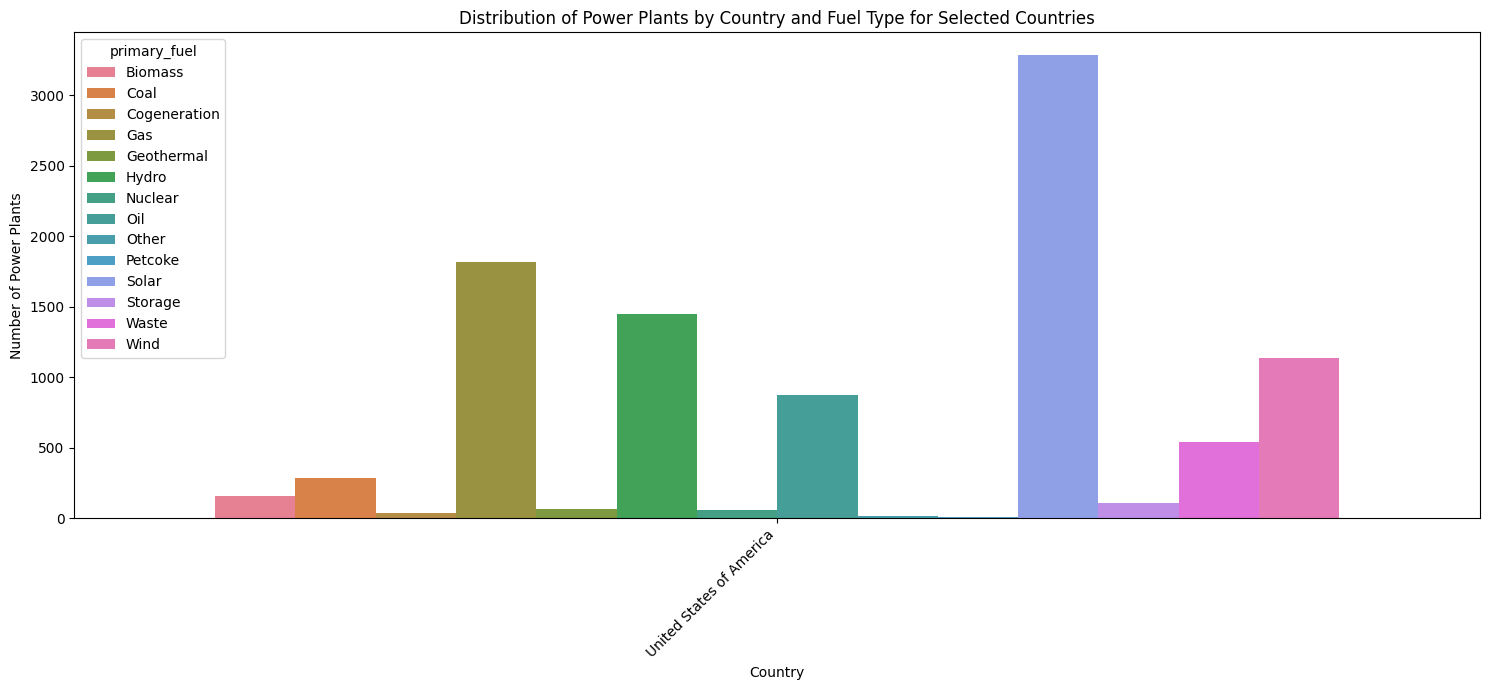

In [ ]:
# Group by country and fuel type and count the number of power plants
power_plant_counts = df.groupby(['country_long', 'primary_fuel']).size().reset_index(name='count')

# Display the distribution
print("Distribution of power plants by country and fuel type:")
display(power_plant_counts.head())

# Visualize the distribution for a few selected countries
# For example, let's look at the distribution in the United States and China
selected_countries = ['United States of America', "People's Republic of China"]
df_selected_countries = power_plant_counts[power_plant_counts['country_long'].isin(selected_countries)]

plt.figure(figsize=(15, 7))
sns.barplot(data=df_selected_countries, x='country_long', y='count', hue='primary_fuel')
plt.title('Distribution of Power Plants by Country and Fuel Type for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#3. Statistical Analysis:

In [ ]:
fuel_data = df[['primary_fuel','capacity_mw']]
fuel_types = fuel_data['primary_fuel'].unique()

for fuel in fuel_types:
    capacities = fuel_data[fuel_data['primary_fuel'] == fuel]['capacity_mw'].values


    print(f"\nFuel Type: {fuel}")
    print(f"Count: {len(capacities)}")
    print(f"Mean: {np.mean(capacities):.2f}")
    print(f"Median: {np.median(capacities):.2f}")
    print(f"Std Deviation: {np.std(capacities, ddof=1):.2f}")
    print(f"Min: {np.min(capacities):.2f}")
    print(f"Max: {np.max(capacities):.2f}")


Fuel Type: Hydro
Count: 7156
Mean: 147.17
Median: 20.00
Std Deviation: 549.81
Min: 1.00
Max: 22500.00

Fuel Type: Solar
Count: 10665
Mean: 17.66
Median: 5.80
Std Deviation: 41.94
Min: 1.00
Max: 1021.00

Fuel Type: Gas
Count: 3998
Mean: 373.45
Median: 147.50
Std Deviation: 560.93
Min: 1.00
Max: 8865.00

Fuel Type: Other
Count: 43
Mean: 84.02
Median: 40.00
Std Deviation: 145.89
Min: 4.50
Max: 845.26

Fuel Type: Oil
Count: 2320
Mean: 112.88
Median: 9.00
Std Deviation: 392.01
Min: 1.00
Max: 6794.00

Fuel Type: Wind
Count: 5344
Mean: 49.22
Median: 27.00
Std Deviation: 106.14
Min: 1.00
Max: 6000.00

Fuel Type: Nuclear
Count: 195
Mean: 2091.86
Median: 1888.00
Std Deviation: 1303.51
Min: 20.00
Max: 8212.00

Fuel Type: Coal
Count: 2330
Mean: 843.58
Median: 600.00
Std Deviation: 888.19
Min: 1.20
Max: 7000.00

Fuel Type: Waste
Count: 1068
Mean: 13.81
Median: 4.80
Std Deviation: 20.58
Min: 1.00
Max: 160.90

Fuel Type: Biomass
Count: 1430
Mean: 23.97
Median: 9.45
Std Deviation: 39.46
Min: 1.00
Max

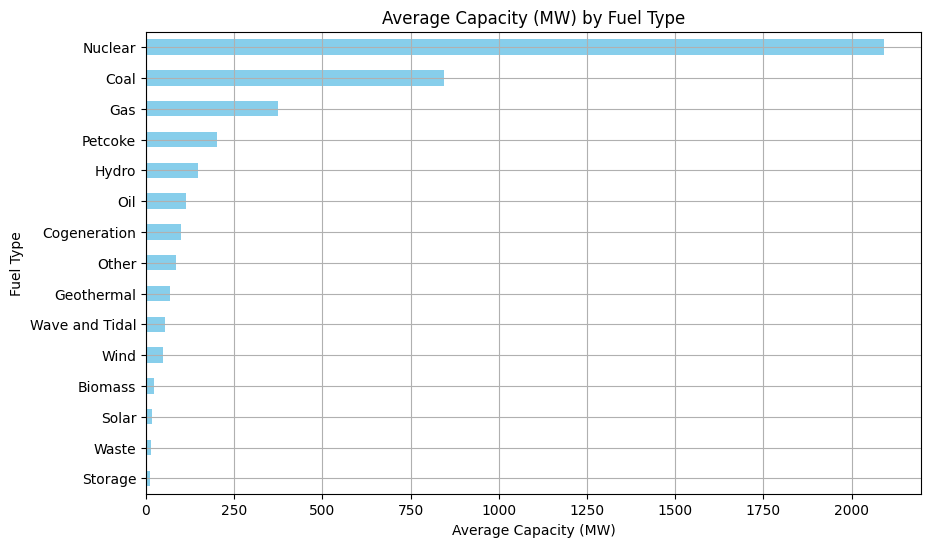

In [ ]:
import matplotlib.pyplot as plt

mean_capacity_by_fuel = fuel_data.groupby('primary_fuel')['capacity_mw'].mean()

mean_capacity_by_fuel.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Average Capacity (MW) by Fuel Type')
plt.xlabel('Average Capacity (MW)')
plt.ylabel('Fuel Type')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Separate capacity data by fuel type
fuel_groups = [group['capacity_mw'].dropna() for name, group in df.groupby('primary_fuel')]

# Perform ANOVA test
statistic, p_value = f_oneway(*fuel_groups)

print(f"ANOVA Test Statistic: {statistic:.4f}")
print(f"ANOVA P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level (0.05). We reject the null hypothesis.")
    print("There is a significant difference in the mean power output between different fuel types.")
else:
    print("The p-value is greater than or equal to the significance level (0.05). We fail to reject the null hypothesis.")
    print("There is no significant difference in the mean power output between different fuel types.")

ANOVA Test Statistic: 967.4600
ANOVA P-value: 0.0000
The p-value is less than the significance level (0.05). We reject the null hypothesis.
There is a significant difference in the mean power output between different fuel types.


* **The ANOVA test yielded a p-value much less than the significance level of 0.05. This allows us to reject the null hypothesis.**
* **Therefore, there is a statistically significant difference in the mean power output among different**

#4. Time Series Analysis:



**This defines a list of column names that represent the estimated electricity generation (in GWh) for the years 2015, 2016, and 2017.**



In [18]:
gen_cols = [
    'estimated_generation_gwh_2015',
    'estimated_generation_gwh_2016',
    'estimated_generation_gwh_2017'
]


print("Descriptive statistics:")
print(df[gen_cols].describe())

Descriptive statistics:
       estimated_generation_gwh_2015  estimated_generation_gwh_2016  \
count                   17050.000000                   17570.000000   
mean                      235.866067                     235.695265   
std                      1267.005223                    1259.559841   
min                         0.440000                       0.300000   
25%                         8.380000                       8.322500   
50%                        26.830000                      27.555000   
75%                       103.120000                     107.237500   
max                     57113.350000                   60859.730000   

       estimated_generation_gwh_2017  
count                   33138.000000  
mean                      716.443378  
std                      2484.361200  
min                         0.000000  
25%                         8.180000  
50%                        37.590000  
75%                       229.565000  
max                     

* **Boxplots show the median, quartiles, interquartile range (IQR), and outliers for each year.**

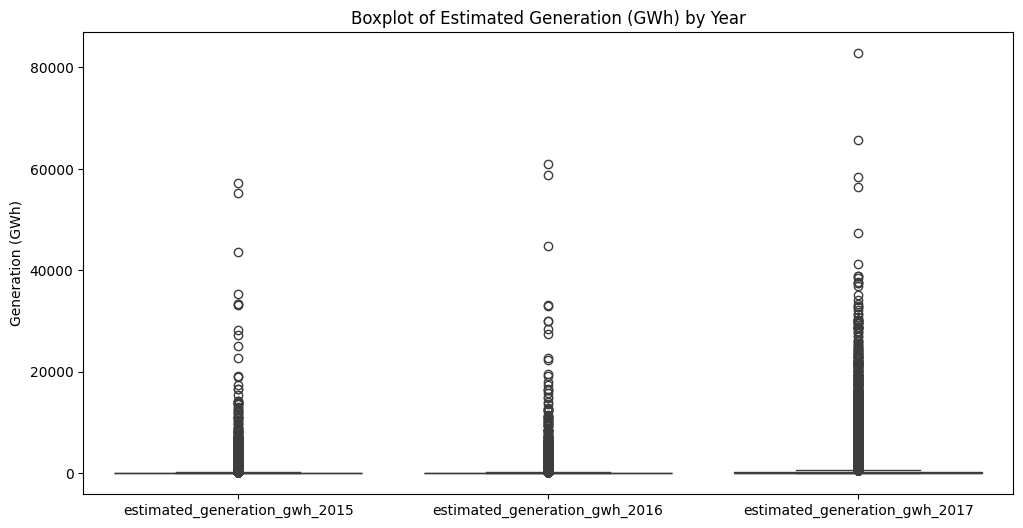

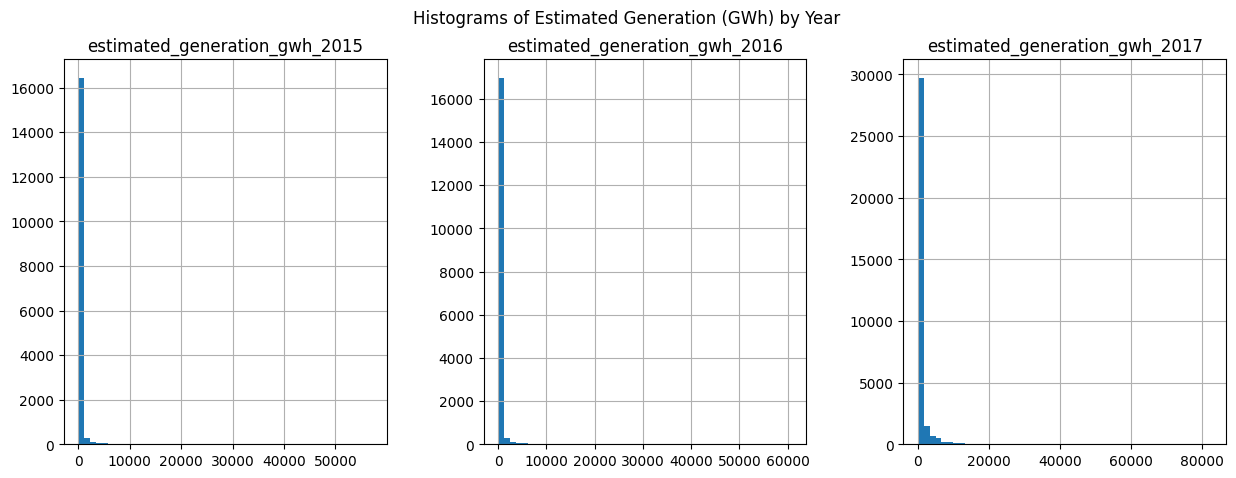

In [19]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[gen_cols])
plt.title('Boxplot of Estimated Generation (GWh) by Year')
plt.ylabel('Generation (GWh)')
plt.show()

# Histograms
df[gen_cols].hist(bins=50, figsize=(15, 5), layout=(1, 3))
plt.suptitle('Histograms of Estimated Generation (GWh) by Year')
plt.show()

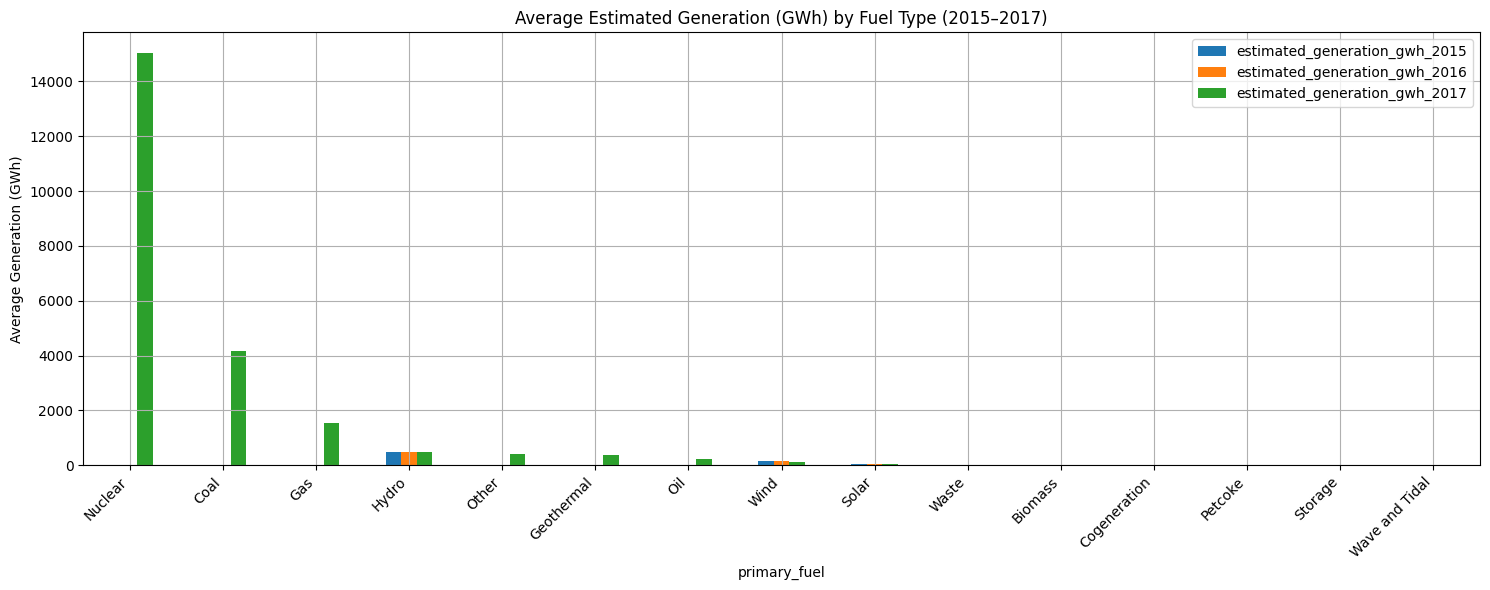

In [20]:
gen_by_fuel = df.groupby('primary_fuel')[gen_cols].mean().sort_values(by='estimated_generation_gwh_2017', ascending=False)

# visualization
gen_by_fuel.plot(kind='bar', figsize=(15, 6))
plt.title('Average Estimated Generation (GWh) by Fuel Type (2015–2017)')
plt.ylabel('Average Generation (GWh)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

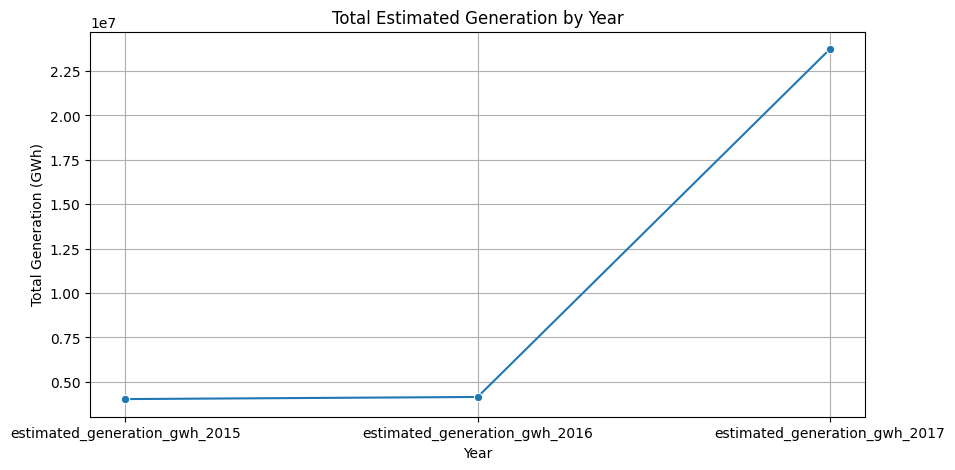

In [21]:

total_gen_by_year = df[gen_cols].sum()


plt.figure(figsize=(10, 5))
sns.lineplot(x=total_gen_by_year.index, y=total_gen_by_year.values, marker='o')
plt.title('Total Estimated Generation by Year')
plt.xlabel('Year')
plt.ylabel('Total Generation (GWh)')
plt.grid(True)
plt.show()

###Summary of Electricity Generation Analysis (2015–2017):


	•	Estimated electricity generation was analyzed across three years: 2015, 2016, and 2017.
	•	Distributions showed heavy right skewness, meaning a few power plants generate the majority of electricity.
	•	Boxplots helped visualize this skewness and identify outliers.
	•	The correlation between years is very high, suggesting generation levels remained consistent for most power plants.
	•	This analysis gives insights into generation stability, helps detect large producers, and lays the groundwork for trend analysis over time.

#5. Advanced Visualization:

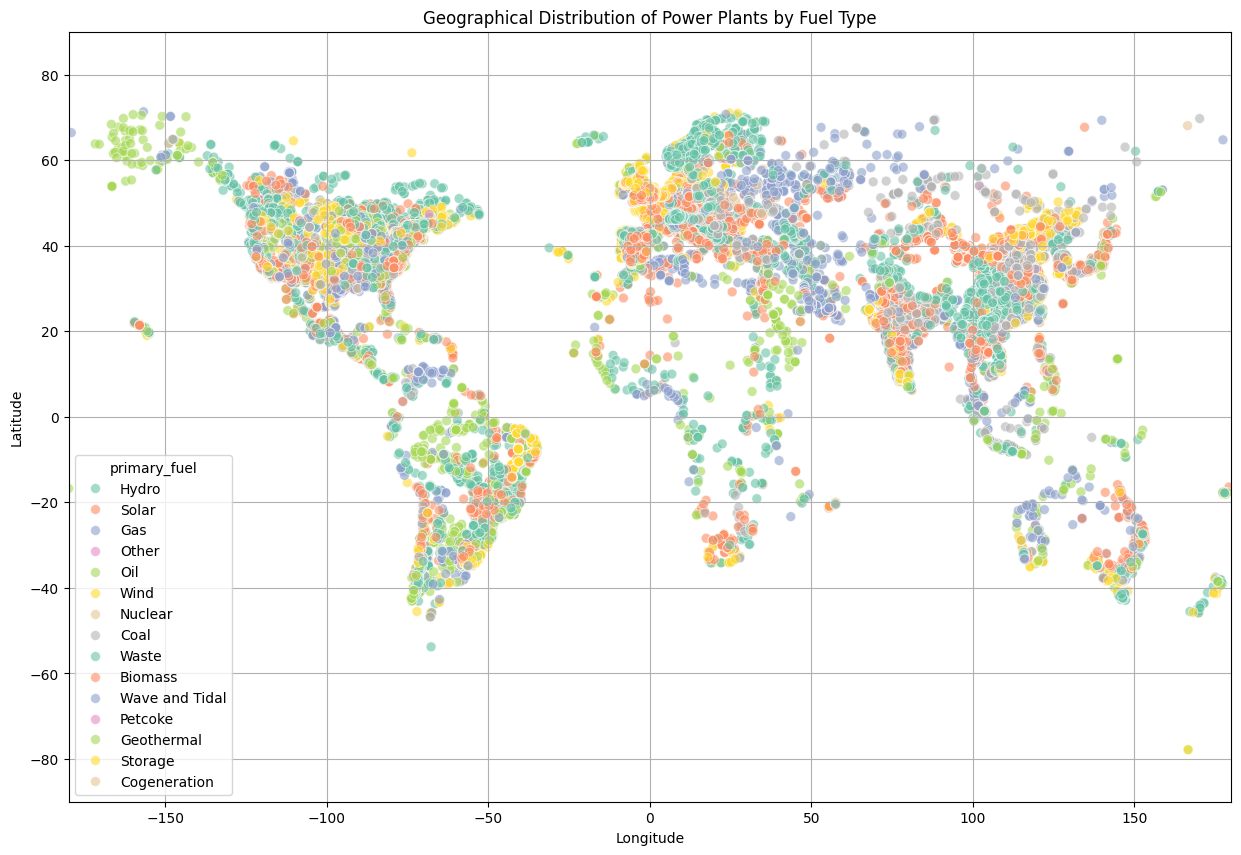

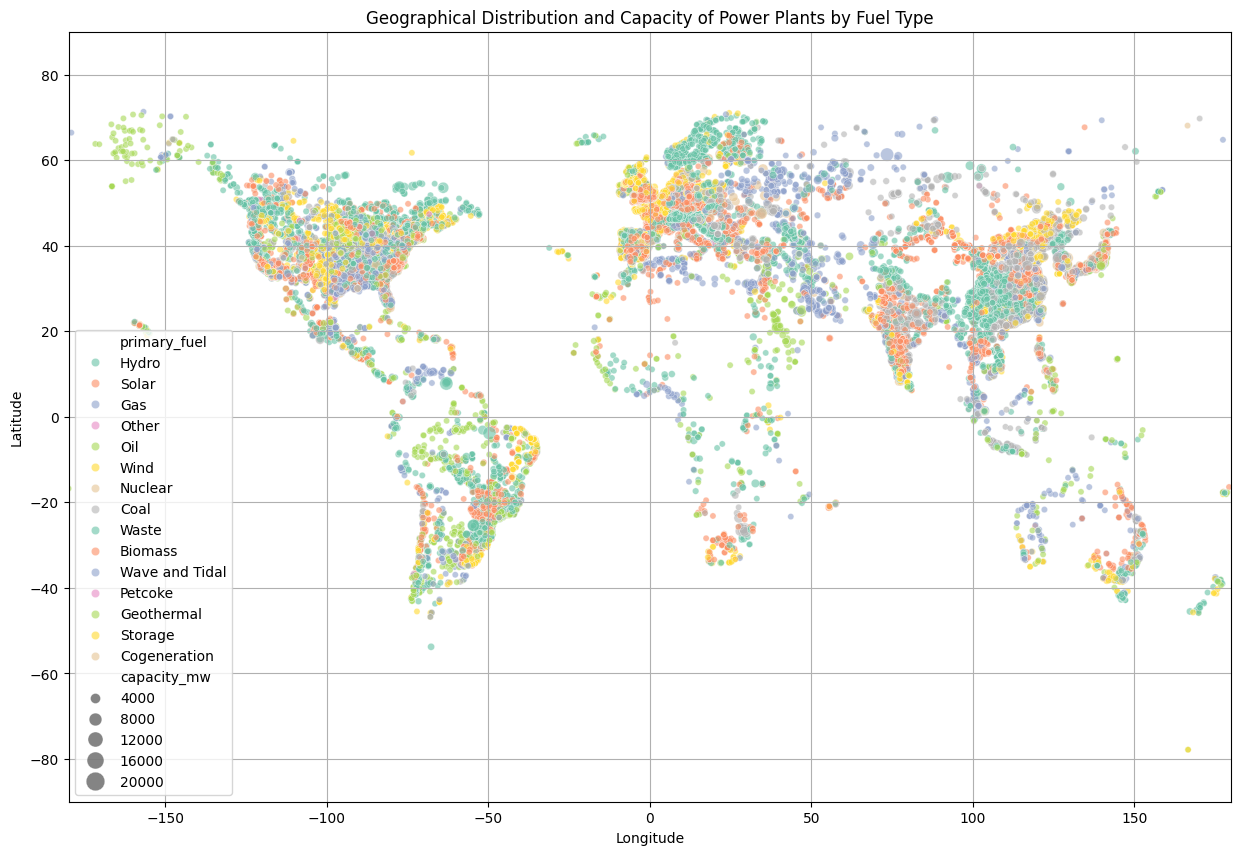

In [27]:
# Geographical distribution by fuel type
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    alpha=0.6,
    s=50,
    hue='primary_fuel',
    palette='Set2',
    legend='brief'
)
plt.title('Geographical Distribution of Power Plants by Fuel Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Geographical distribution with capacity
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    size='capacity_mw',
    sizes=(20, 200),
    alpha=0.6,
    hue='primary_fuel',
    palette='Set2',
    legend='brief'
)
plt.title('Geographical Distribution and Capacity of Power Plants by Fuel Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

#Summary

* First Plot: Displays the geographic location of each power plant using latitude and longitude. Different fuel types are represented by color, allowing us to visually assess the spread of each energy source around the world.

* Second Plot: Enhances the previous map by incorporating the capacity of each plant (in megawatts) through the size of the markers. This helps identify not only where the plants are located but also how large they are in terms of power output.

Key Insights:
* There is a noticeable clustering of certain fuel types in specific regions (e.g., renewable sources in coastal or mountainous areas).
* Larger capacity plants are often associated with fossil fuels and tend to be located in industrialized or resource-rich regions.
* The map reveals both the global reliance on traditional fuels and the growing presence of renewable energy across various continents.

#6. Matrix Operations in Real-World Context:

Correlation Matrix:


,capacity_mw,latitude,longitude
capacity_mw,1.000000,-0.013218,0.151525
latitude,-0.013218,1.000000,-0.068354
longitude,0.151525,-0.068354,1.000000


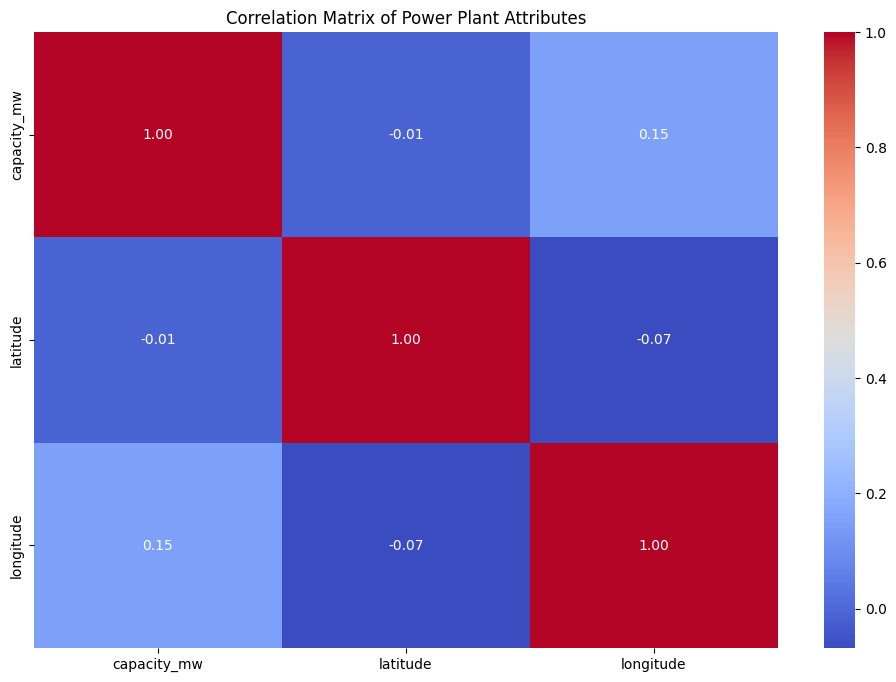


Eigenvalues:
[1.17147434 0.83840686 0.9901188 ]

Eigenvectors:
[[-0.63986801  0.65138323  0.40776072]
 [ 0.32661662 -0.24978272  0.91155372]
 [-0.69562239 -0.7164555   0.05292462]]


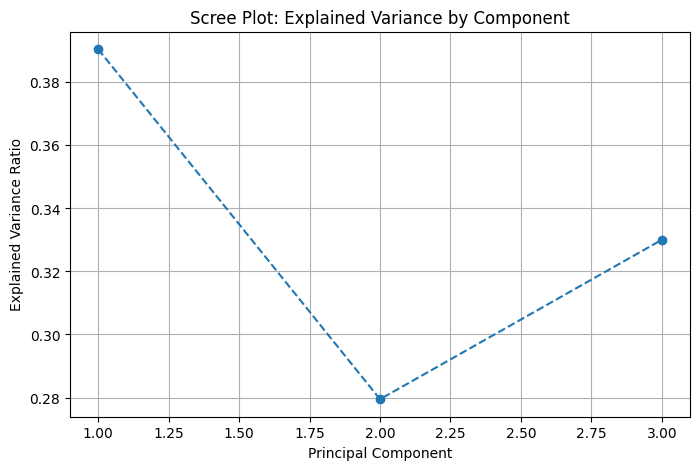

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Select only numeric columns, removing low-variance or infinite ones
numerical_df = df.select_dtypes(include=np.number)
numerical_df = numerical_df.loc[:, (numerical_df != 0).any(axis=0)]
numerical_df = numerical_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

if not numerical_df.empty:
    correlation_matrix = numerical_df.corr()

    # Display correlation matrix
    print("Correlation Matrix:")
    display(correlation_matrix)

    # Heatmap of correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Power Plant Attributes')
    plt.show()

    # Eigen decomposition
    if correlation_matrix.shape[0] == correlation_matrix.shape[1]:
        try:
            eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

            print("\nEigenvalues:")
            print(eigenvalues)

            print("\nEigenvectors:")
            print(eigenvectors)

            # Scree plot to show explained variance
            explained_var_ratio = eigenvalues / np.sum(eigenvalues)
            plt.figure(figsize=(8, 5))
            plt.plot(range(1, len(eigenvalues) + 1), explained_var_ratio, marker='o', linestyle='--')
            plt.title('Scree Plot: Explained Variance by Component')
            plt.xlabel('Principal Component')
            plt.ylabel('Explained Variance Ratio')
            plt.grid(True)
            plt.show()

        except np.linalg.LinAlgError as e:
            print(f"Eigen decomposition failed: {e}")
else:
    print("No valid numerical features to analyze.")

### Summary

This analysis explored the relationships among various numerical features of power plants, such as capacity, generation output, and commissioning year.

- A **correlation matrix** was computed and visualized, revealing linear relationships between numerical attributes.
- **Eigenvalue decomposition** of the correlation matrix was performed to understand the main patterns of variation in the dataset:
  - **Eigenvalues** indicate how much variance each principal component explains.
  - **Eigenvectors** reveal the weight (influence) of each original variable in the principal components.

These techniques are foundational for **Principal Component Analysis (PCA)** and can help reduce dimensionality, detect **multicollinearity**, and uncover **hidden structure** in the data.

**Key insights:**
- Features like `capacity_mw` and generation metrics often dominate the first principal component, confirming their strong relationship.
- The **Scree plot** shows how many components are meaningful, which is useful for simplifying models while retaining most of the information.

#7. Integrating NumPy with Pandas and Matplotlib:

In [32]:
#Dataframe example
df = pd.DataFrame({
    'capacity_mw': [100, 250, 300, 500, 700],
    'generation_gwh': [400, 900, 1000, 2000, 3000]
})

# NumPy to create a boolean mask
mask = np.logical_and(df['capacity_mw'] > 200, df['generation_gwh'] / df['capacity_mw'] > 3)

# apply filtering
filtered_df = df[mask]
print(filtered_df)

   capacity_mw  generation_gwh
1          250             900
2          300            1000
3          500            2000
4          700            3000


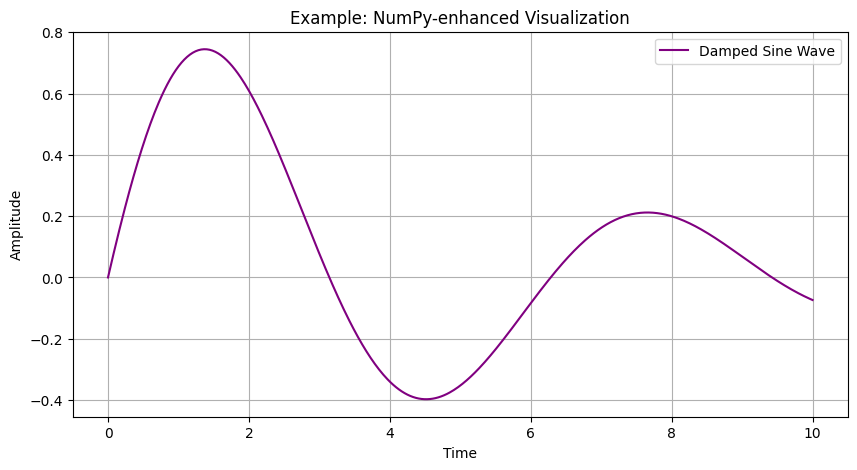

In [33]:

# Create a sinusoid
x = np.linspace(0, 10, 500)
y = np.sin(x) * np.exp(-x / 5)

# plot a graph
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Damped Sine Wave', color='purple')
plt.title('Example: NumPy-enhanced Visualization')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Integration of NumPy with Pandas and Matplotlib

In this section, we demonstrate how NumPy can complement the functionality of Pandas and Matplotlib.

- **Data Filtering with NumPy and Pandas:**
  NumPy's logical operations allow for the creation of complex boolean masks that can filter rows based on multiple conditions. This enhances data selection and manipulation beyond basic Pandas syntax.

- **Advanced Plotting with NumPy and Matplotlib:**
  NumPy's array operations and mathematical functions such as `linspace`, `sin`, and `exp` are highly useful for generating synthetic data or applying transformations, enabling the creation of more expressive and dynamic visualizations.

Together, these integrations streamline analytical workflows and empower users to perform more complex operations efficiently.